In [1]:
#Tài liệu tham khảo: https://phamdinhkhanh.github.io/2019/12/12/ARIMAmodel.html

## 1. Lý thuyết mô hình ARIMA


- Dựa vào dữ liệu quá khứ dựa trên các giả định có thể lặp lại ở tương lai
- Các yếu tố thường thấy trong chuỗi thời gian: Tính mùa vụ, tính chu kỳ, tính xu thế
- Các mô hình dự báo trong kinh tế lượng có những đặc trưng rất riêng như ARIMA, SARIMA, ARIMAX,... 

### 1.1 ***Mô hình ARIMA***: 
+ Dựa vào lý thuyết chuỗi dừng và phương sai không đổi. 
        - Nó bao gồm chuỗi tự hồi quy AR(p)
        - Chuỗi trung bình trượt MA(q)
+ Hầu hết các chuỗi thời gian sẽ có xu hướng tăng hoặc giảm theo thời gian, do đó yếu tố chuỗi dừng thường không đạt   được. Trong trường hợp chuỗi không dừng thì ta sẽ cần biến đổi sang chuỗi dừng bằng sai phân
+ Khi đó tham số của mô hình sẽ thêm phần sai phân

### 1.2 Mô hình SARIMA

+ Về bản chất đây là mô hình ARIMA nhưng được điều chỉnh đặc biệt để áp dụng cho những chuỗi thời gian có yếu tố mùa vụ. Như chúng ta đã biết về bản chất ARIMA chính là mô hình hồi qui tuyến tính nhưng mối quan hệ tuyến tính thường không giải thích tốt chuỗi trong trường hợp chuỗi xuất hiện yếu tố mùa vụ. Chính vì thế, bằng cách tìm ra chu kì của qui luật mùa vụ và loại bỏ nó khỏi chuỗi ta sẽ dễ dàng hồi qui mô hình theo phương pháp ARIMA.

## 2. Thực hành

### 2.1 Chuẩn bị thư viện và dữ liệu

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

In [43]:
df = pd.read_csv('BTC_CSV5.csv')
df.pop('Currency')
df.pop('24h Open (USD)')
df.pop('24h High (USD)')
df.pop('24h Low (USD)')
df.pop('Closing Price (USD)')
df

,Date,Closing_Price
0,2020-05-21,0.954089
1,2020-05-22,0.914115
2,2020-05-23,0.919285
3,2020-05-24,0.922008
4,2020-05-25,0.904872
...,...,...
362,2021-05-18,4.314447
363,2021-05-19,4.319605
364,2021-05-20,3.943924
365,2021-05-21,3.975609


**Import dữ liệu và loại bỏ những trường không cần thiết**

**Lấy cột Date làm cột Index**

In [44]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index("Date",inplace=True)

In [45]:
df

,Closing_Price
Date,
2020-05-21,0.954089
2020-05-22,0.914115
2020-05-23,0.919285
2020-05-24,0.922008
2020-05-25,0.904872
...,...
2021-05-18,4.314447
2021-05-19,4.319605
2021-05-20,3.943924


**Vẽ đồ thị minh họa**

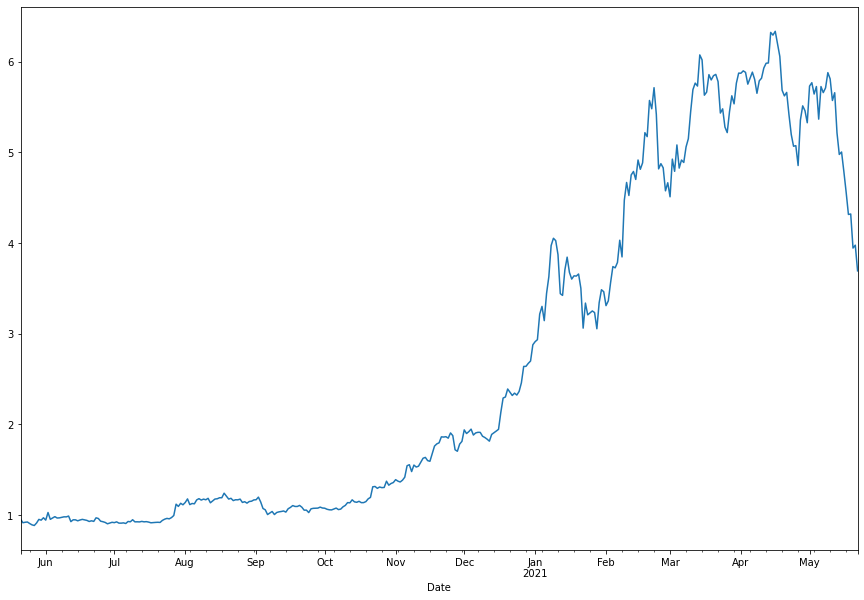

In [46]:
df['Closing_Price'].plot(kind='line',figsize=(15, 10))

plt.show()

=> Nhìn vào đồ thị ta thấy giá BTC từ tháng 1 đến tháng 11 năm 2020 tăng giảm những không đồng đều

=> Từ tháng 12 năm 2020 đến tháng 4 năm 2021 giá BTC tăng mạnh, đến cuối tháng 5 thì giá BTC giảm sâu.

=> Đều này cho biết 1 điều đồ thị là một chuỗi không dừng 

**Chia Train/Test**

In [47]:
train, test = df[df.index < '2021-01-01'], df[df.index >= '2021-01-01']
print('train shape: ', train.shape)
print('test shape: ', test.shape)

train shape:  (225, 1)
test shape:  (142, 1)


### 2.2 Kiểm tra tính dừng của chuỗi thời gian và đưa về chuỗi dừng

- Một chuỗi thời gian có tính dừng là một chuỗi thời gian có trung bình, phương sai, hiệp phương sai không đổi theo thời gian

!["Chuoi Dung, Chuoi Khong Dung"](https://miro.medium.com/max/1147/1*xdblkZyg6YmmReAkZHUksw.png)

- Chuỗi thời gian có tính xu thế thì ta không biết xu thế là gì để chúng ta dự báo đây là yếu tố ngẫu nhiên

- Kiểm tra chuỗi dừng

In [48]:
print("p-value:", adfuller(train.dropna())[1])

p-value: 1.0


In [49]:
#Link tham khảo: https://www.youtube.com/watch?v=1opjnegd_hA

- Vì p-value > 0.05 nên chuỗi thời gian là không dừng

- Đưa về chuỗi dừng

In [50]:
diff_1 = train.diff().dropna()
print("p-value:", adfuller(diff_1.dropna())[1])

p-value: 5.314274119928386e-24


In [51]:
diff_1

,Closing_Price
Date,
2020-05-22,-0.039974
2020-05-23,0.005169
2020-05-24,0.002723
2020-05-25,-0.017136
2020-05-26,-0.014293
...,...
2020-12-27,0.180029
2020-12-28,0.000799
2020-12-29,0.032874


### 2.3 Thực hiện Mô Hình ARIMA

In [52]:
import pmdarima as pmd

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=0, 
                              start_q=0)
    return autoarima_model

In [53]:
arima_model = arimamodel(train)
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  225
Model:               SARIMAX(0, 2, 1)   Log Likelihood                 400.807
Date:                Sun, 27 Jun 2021   AIC                           -795.613
Time:                        18:52:16   BIC                           -785.392
Sample:                             0   HQIC                          -791.487
                                - 225                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002   9.84e-05      1.804      0.071   -1.53e-05       0.000
ma.L1         -0.9676      0.024    -39.926      0.000      -1.015      -0.920
sigma2         0.0016   8.56e-05     18.550      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):               256.47
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):               4.68   Skew:                             0.85
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

=> Theo Formula ARIMA nếu mô hình nào có AIC nhỏ nhất và tốc độ thực hiện nhanh nhất thì chọn mô hình đó

**Chỉ số AIC** 


Một trong những tiêu chí thường được sử dụng để lựa chọn mô hình đó là chỉ số AIC (Akaike Information Criteria). Tiêu chí thông tin này là một công cụ ước tính lỗi dự báo và do đó đánh giá chất lượng tương đối của các mô hình thống kê trên một tập hợp dữ liệu nhất định. Gỉa sử có một tập hợp các mô hình được xây dựng trên cùng một bộ dữ liệu, AIC ước tính chất lượng của từng mô hình trong mối liên quan đến từng mô hình khác. Do đó, AIC cung cấp một phương tiện để lựa chọn mô hình. AIC được hình thành dựa trên lý thuyết thông tin (information theory). Khi một mô hình thống kê được sử dụng để dự báo, kết quả sẽ gần như không bao giờ chính xác hoàn toàn. Vì vậy một số thông tin sẽ bị mất do không thể dự báo từ mô hình. AIC ước tính lượng thông tin tương đối bị mất bởi một mô hình nhất định: mô hình mất càng ít thông tin thì chất lượng của mô hình đó càng cao. Giả sử rằng chúng ta có một mô hình thống kê tương ứng với một bộ dữ liệu. Gọi  là số lượng tham số ước tính trong mô hình. Đặt 
 là giá trị tối đa của hàm hợp lý (maximum likelihood function) của mô hình. 

$AIC= $$2k-$$2ln(L)$

In [25]:
#Tài liệu tham khảo: https://luanvanhay.org/huong-dan/r-cach-tinh-loglikelihood-aic-bic/
# Tham khảo: https://viblo.asia/p/so-luoc-ve-maximum-likelihood-estimation-1Je5EvrYKnL

Thực ra,  LogLikelihood = ln(Likelihood). Nên trong ví dụ này chúng ta nói là LogLikelihood hay Likelihood cũng được.

Trong thống kê , hàm Likelihood (thường được gọi đơn giản là khả năng, một số nơi gọi là ước lượng hợp lí ) đo lường mức độ phù hợp của mô hình thống kê với một mẫu dữ liệu cho các giá trị đã cho của các tham số chưa biết . Nó được hình thành từ phân phối xác suất chung của mẫu, nhưng chỉ được xem và sử dụng như một hàm của các tham số, do đó xử lý các biến ngẫu nhiên là cố định tại các giá trị quan sát được.

Hàm LogLikelihood  mô tả một siêu mặt có đỉnh, nếu nó tồn tại, biểu thị sự kết hợp của các giá trị tham số mô hình nhằm tối đa hóa xác suất vẽ mẫu thu được.  Quy trình lấy các đối số này của ước lượng hợp lí cực đại  tối đa được gọi là ước lượng khả năng tối đa , để thuận tiện cho việc tính toán thường được thực hiện bằng cách sử dụng logarit tự nhiên của khả năng, được gọi là hàm khả năng log . Ngoài ra, hình dạng và độ cong của bề mặt khả năng thể hiện thông tin về độ ổn định của các ước tính, đó là lý do tại sao hàm khả năng thường được vẽ như là một phần của phân tích thống kê.

Trường hợp sử dụng khả năng lần đầu tiên được thực hiện bởi RA Fisher ,  người tin rằng đây là một khuôn khổ khép kín cho mô hình thống kê và suy luận. Sau đó, Barnard và Birnbaum đã lãnh đạo một trường phái tư tưởng ủng hộ nguyên tắc khả năng , quy định rằng tất cả các thông tin liên quan để suy luận được chứa trong hàm khả năng. Nhưng ngay cả trong thống kê thường xuyên và Bayes , chức năng khả năng đóng vai trò cơ bản

Công thức để tính Likelihood bằng tay là quá phực tạp, tuỳ từng model mà có cách tính khác nhau, trong ví dụ này chúng tôi hướng dẫn dẫn các bạn dùng hàm logLik() trong R cách tính LogLikelihood tương đối đơn giản và nhanh chóng.

### 2.4 Đánh giá mô hình ARIMA

In [54]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [55]:
test['ARIMA'] = arima_model.predict(len(test))
test

<ipython-input-55-f5c5986f8dbb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ARIMA'] = arima_model.predict(len(test))


,Closing_Price,ARIMA
Date,,
2021-01-01,2.911152,2.912486
2021-01-02,2.933361,2.948265
2021-01-03,3.215417,2.984222
2021-01-04,3.300254,3.020356
2021-01-05,3.143161,3.056668
...,...,...
2021-05-18,4.314447,9.467893
2021-05-19,4.319605,9.527991
2021-05-20,3.943924,9.588265


In [56]:
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [57]:
dubao = test['ARIMA'].values
dubao

array([2.91248551, 2.9482649 , 2.9842218 , 3.02035621, 3.05666811,
       3.09315752, 3.12982444, 3.16666886, 3.20369079, 3.24089021,
       3.27826715, 3.31582159, 3.35355353, 3.39146297, 3.42954992,
       3.46781438, 3.50625634, 3.5448758 , 3.58367277, 3.62264724,
       3.66179922, 3.7011287 , 3.74063569, 3.78032018, 3.82018217,
       3.86022167, 3.90043867, 3.94083318, 3.98140519, 4.02215471,
       4.06308173, 4.10418625, 4.14546828, 4.18692781, 4.22856485,
       4.27037939, 4.31237144, 4.35454099, 4.39688804, 4.4394126 ,
       4.48211467, 4.52499423, 4.56805131, 4.61128588, 4.65469796,
       4.69828755, 4.74205464, 4.78599923, 4.83012133, 4.87442094,
       4.91889804, 4.96355265, 5.00838477, 5.05339439, 5.09858151,
       5.14394614, 5.18948828, 5.23520791, 5.28110506, 5.3271797 ,
       5.37343185, 5.41986151, 5.46646867, 5.51325333, 5.5602155 ,
       5.60735517, 5.65467235, 5.70216703, 5.74983921, 5.7976889 ,
       5.8457161 , 5.8939208 , 5.942303  , 5.99086271, 6.03959

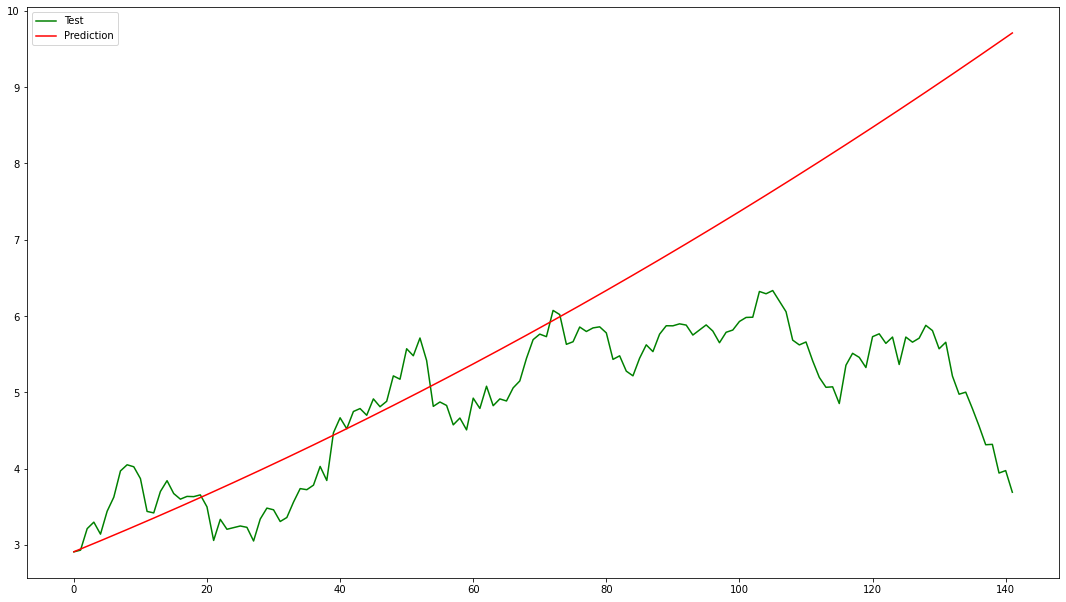

In [58]:
import matplotlib
import matplotlib.pyplot as plt


fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(test['Closing_Price'].values, color='green', label = "Test")
plt.plot(dubao, color='red', label = "Prediction")
plt.legend()
plt.savefig("PassengerPrediction.png")

In [59]:
#MAPE
mean_absolute_percentage_error(test.Closing_Price, test.ARIMA)

26.561815837155095

In [60]:
#MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test.Closing_Price,  test.ARIMA)

1.3075117529490505

In [61]:
#MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(test.Closing_Price,  test.ARIMA)

3.6623862955169324

In [62]:
# multi-step out-of-sample forecast

forecast = arima_model.predict(len(test))

In [63]:
forecast

array([2.91248551, 2.9482649 , 2.9842218 , 3.02035621, 3.05666811,
       3.09315752, 3.12982444, 3.16666886, 3.20369079, 3.24089021,
       3.27826715, 3.31582159, 3.35355353, 3.39146297, 3.42954992,
       3.46781438, 3.50625634, 3.5448758 , 3.58367277, 3.62264724,
       3.66179922, 3.7011287 , 3.74063569, 3.78032018, 3.82018217,
       3.86022167, 3.90043867, 3.94083318, 3.98140519, 4.02215471,
       4.06308173, 4.10418625, 4.14546828, 4.18692781, 4.22856485,
       4.27037939, 4.31237144, 4.35454099, 4.39688804, 4.4394126 ,
       4.48211467, 4.52499423, 4.56805131, 4.61128588, 4.65469796,
       4.69828755, 4.74205464, 4.78599923, 4.83012133, 4.87442094,
       4.91889804, 4.96355265, 5.00838477, 5.05339439, 5.09858151,
       5.14394614, 5.18948828, 5.23520791, 5.28110506, 5.3271797 ,
       5.37343185, 5.41986151, 5.46646867, 5.51325333, 5.5602155 ,
       5.60735517, 5.65467235, 5.70216703, 5.74983921, 5.7976889 ,
       5.8457161 , 5.8939208 , 5.942303  , 5.99086271, 6.03959

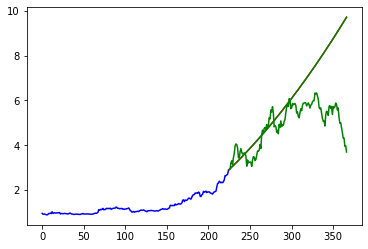

In [64]:
x = np.arange(df.shape[0])
plt.plot(x[:225], train, c='blue')
plt.plot(x[225:], forecast, c='red')
plt.plot(x[225:], test, c='green')
plt.show()

In [65]:
test = test.append({'Closing_Price':0},ignore_index=True)

In [66]:
test

,Closing_Price,ARIMA
0,2.911152,2.912486
1,2.933361,2.948265
2,3.215417,2.984222
3,3.300254,3.020356
4,3.143161,3.056668
...,...,...
138,4.319605,9.527991
139,3.943924,9.588265
140,3.975609,9.648718
141,3.692177,9.709348


In [67]:
test['ARIMA'] = arima_model.predict(len(test))

In [41]:
test

,Closing_Price,ARIMA
0,2.911152,2.912486
1,2.933361,2.948265
2,3.215417,2.984222
3,3.300254,3.020356
4,3.143161,3.056668
...,...,...
138,4.319605,9.527991
139,3.943924,9.588265
140,3.975609,9.648718
141,3.692177,9.709348
